In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
from psm.logger import MockLogger

from gbstrategy import SuccessiveHalvingStrategy
from gbstrategy.core import DemoDriver, ExampleLoss1, Interface, StrategyMachineFactory

logger = MockLogger()
interf = Interface()
loss = ExampleLoss1()
demo = DemoDriver(interf, loss)

testcase_0 = [
    {
        'trigger': 'ReceiveRandomSearchHyperparams',
        'data': {'num_exp':16, 'epoch':2}
    }, {
        'trigger': 'ReceiveHyperparams',
        'data': {
            'learning_rate': [0.001,0.01],
        }
    }, {
        'trigger': 'ReceiveTrainingLoss',
        'data': {'exp_id'    : 'blah',
                 'epoch'     : 4,
                 'loss_name' : 'blah',
                 'loss_value': 0.09}
    }
]

for t in testcase_0[0:3]:
    strategy = SuccessiveHalvingStrategy()
    factory = StrategyMachineFactory(strategy, logger, interf)
    psm = factory.generate_psm()
    data = t['data']
    print(t['trigger'])
    strategy.trigger(t['trigger'], **data)
    del strategy, factory, psm, data

ReceiveRandomSearchHyperparams
ReceiveHyperparams
ReceiveTrainingLoss


In [32]:
from tqdm import *
import numpy as np
for i in tqdm(range(2000)):
    interf.next_time_point()

100%|██████████| 2000/2000 [00:15<00:00, 129.63it/s]


In [33]:
data = {}
triggers = logger._find_all_triggers()
for t in triggers:
    t.aggregate_data(data)
training_loss = data['trainingloss']

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_utils import RGBALabelTransformer
%matplotlib inline

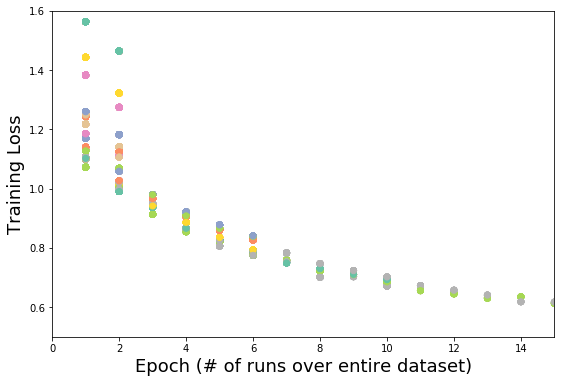

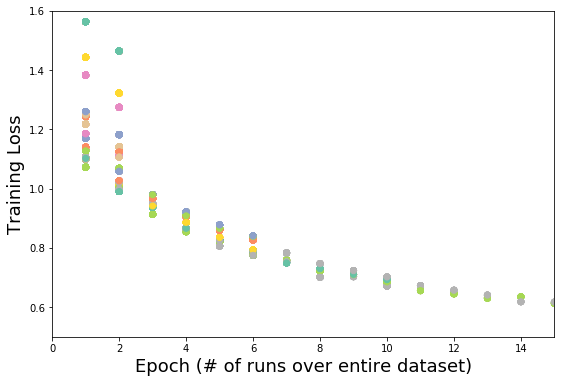

In [43]:
from IPython import display
import time

NUM_EXPS = 200
cm = RGBALabelTransformer('Set2')
cm.fit(list(range(NUM_EXPS)))

fig = plt.gcf()
fig.set_size_inches((9,6))

plt.xlabel('Epoch (# of runs over entire dataset)', fontsize=18)
plt.xlim(0,15)
plt.ylabel('Training Loss',fontsize=18)
plt.ylim(0.5,1.6)

for idx in range(100):
    df = pd.DataFrame(training_loss).iloc[:idx]
    df['color_id'] = 0
    id2color = {}
    color_cnt = 0
    for i in range(len(df)):
        exp_id = df.exp_id.iloc[i]
        if exp_id not in id2color:
            id2color[exp_id] = color_cnt
            color_cnt += 1
    df['color_id'] = df.exp_id.apply(lambda exp_id: id2color[exp_id])
    df['logloss'] = np.log10(df.loss_value)
    # df.head()

    plt.scatter(df.epoch, df.loss_value, c=cm.transform(df.color_id))
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.001)
    # g = sns.lmplot(x="epoch", y="logloss", data=df)

In [44]:
logger.printmocklog()

0
{'event_id': 1, 'event_type': 'EnterState', 'event_name': 'Init', 'rand_stamp': 1811126268, 'timestamp': datetime.datetime(2017, 12, 4, 11, 16, 17, 360683), 'data': {}}

1
{'event_id': 2, 'event_type': 'Trigger', 'event_name': 'ReceiveRandomSearchHyperparams', 'rand_stamp': 3703436362, 'timestamp': datetime.datetime(2017, 12, 4, 11, 16, 17, 361977), 'data': {'num_exp': 16, 'epoch': 2}}

2
{'event_id': 3, 'event_type': 'EnterState', 'event_name': 'StrategyHyperparamsSet', 'rand_stamp': 3766272109, 'timestamp': datetime.datetime(2017, 12, 4, 11, 16, 17, 362036), 'data': {'num_exp': 16, 'total_num_epochs': 2}}

3
{'event_id': 4, 'event_type': 'Trigger', 'event_name': 'ReceiveHyperparams', 'rand_stamp': 3733395814, 'timestamp': datetime.datetime(2017, 12, 4, 11, 16, 17, 363502), 'data': {'learning_rate': [0.001, 0.01]}}

4
{'event_id': 5, 'event_type': 'Action', 'event_name': 'RunExp', 'rand_stamp': 3137309418, 'timestamp': datetime.datetime(2017, 12, 4, 11, 16, 17, 364633), 'data': {'ex